In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def min_max_norm(val, min_val, max_val, new_min, new_max):
  return (val - min_val) * (new_max - new_min) / (max_val - min_val) + new_min

In [ ]:
class Chromosome:
  def __init__(self, length, array=None): #if array is None it should be initialized with random binary vector
    if array is None:
      array = [random.choice([0, 1]) for i in range(length)]
    self.array = array
    self.length = length


  def decode(self, lower_bound, upper_bound, aoi):
      decoded = max_bin = '0b'
      for i in range(upper_bound - lower_bound + 1):
        decoded += str(self.array[lower_bound+i])
        max_bin += '1'
      return min_max_norm(int(decoded.replace('.', ''), 2), 0, int(max_bin.replace('.', ''), 2), aoi[0], aoi[1])


  def mutation(self, probability):
    if random.random() < probability:
      index = random.randint(0, self.length-1)
      self.array[index] = 1 - self.array[index] #bitwise NOT

  def crossover(self, other):
    index = random.randint(0, self.length-1)
    output_array_1 = np.concatenate((self.array[0:index], other.array[index:]), axis=0)
    output_array_2 = np.concatenate((other.array[0:index], self.array[index:]), axis=0)
    return [Chromosome(self.length, output_array_1), Chromosome(self.length, output_array_2)]

In [ ]:
class GeneticAlgorithm:
  def __init__(self, chromosome_length, obj_func_num_args, objective_function, aoi, population_size=1000,
               tournament_size=2, mutation_probability=0.05, crossover_probability=0.8, num_steps=30):
    assert chromosome_length % obj_func_num_args == 0, "Number of bits for each argument should be equal"
    self.chromosome_length = chromosome_length
    self.obj_func_num_args = obj_func_num_args
    self.bits_per_arg = int(chromosome_length / obj_func_num_args)
    self.objective_function = objective_function
    self.aoi = aoi
    self.tournament_size = tournament_size
    self.mutation_probability = mutation_probability
    self.crossover_probability = crossover_probability
    self.num_steps = num_steps
    population = []
    for i in range(population_size):
      population.append(Chromosome(self.chromosome_length))
    self.population = population

  def eval_objective_func(self, chromosome):
    points = []
    for m in range(self.obj_func_num_args):
        points.append(chromosome.decode(0+m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
    return self.objective_function(*points)

  def tournament_selection(self):
    for i in range(self.tournament_size):
      candidates = random.sample(self.population, self.tournament_size)
      return min(candidates, key=lambda chromosome: self.eval_objective_func(chromosome))


  def reproduce(self, parents):
    if random.random() < self.crossover_probability:
      return parents[0].crossover(parents[1])
    else:
      return parents


  def plot_func(self, trace):
    X = np.arange(-2, 3, 0.05)
    Y = np.arange(-4, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    Z = 1.5 - np.exp(-X ** (2) - Y ** (2)) - 0.5 * np.exp(-(X - 1) ** (2) - (Y + 2) ** (2))
    plt.figure()
    plt.contour(X, Y, Z, 10)
    cmaps = [[ii / len(trace), 0, 0] for ii in range(len(trace))]
    plt.scatter([x[0] for x in trace], [x[1] for x in trace], c=cmaps)
    # plt.show()

  def run(self):
    # trace_init = []
    # for m in range(self.obj_func_num_args):
    #     trace_init.append(self.population[0].decode(m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
    # trace = np.array(trace_init)
    # for n in range(len(self.population)-1):
    #   points = []
    #   for m in range(self.obj_func_num_args):
    #     points.append(self.population[n+1].decode(m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
    #   trace = np.vstack([trace, points])
    best_individuals = []
    for i in range(self.num_steps):
      new_population = []

      for j in range(int(len(self.population)/2)):
        parents = random.sample(self.population, 2)
        reproduced = self.reproduce(parents)          #either crossover or parents go through
        new_population.append(reproduced[0])
        new_population.append(reproduced[1])

      for j in range(len(self.population)):
        new_population[j].mutation(self.mutation_probability)
      self.population = new_population

      tournament_output = []
      for j in range(len(self.population)):
        tournament_output.append(self.tournament_selection())
      self.population = tournament_output

      best_individuals.append(min(new_population, key=lambda chromosome: self.eval_objective_func(chromosome)))
      print(self.eval_objective_func(best_individuals[i]))
      # for n in range(len(self.population)):
      #   points = []
      #   for m in range(self.obj_func_num_args):
      #     points.append(self.population[n].decode(m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
      #   trace = np.vstack([trace, points])
    trace_init = []
    for m in range(self.obj_func_num_args):
        trace_init.append(best_individuals[0].decode(m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
    trace = np.array(trace_init)
    for n in range(len(best_individuals)-1):
      points = []
      for m in range(self.obj_func_num_args):
        points.append(best_individuals[n+1].decode(m*self.bits_per_arg, (m+1)*self.bits_per_arg-1, self.aoi))
      trace = np.vstack([trace, points])

    self.plot_func(trace)
    plt.xlim([-3, 3])
    plt.ylim([-4, 3])
    plt.show()



In [ ]:
print(min_max_norm(135, 0, 255, 0, 1))

0.5294117647058824


0.5022958291674652
0.4967571919838312
0.497016311220097
0.497016311220097
0.497016311220097
0.497016311220097
0.497016311220097
0.497016311220097
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312
0.4967571919838312


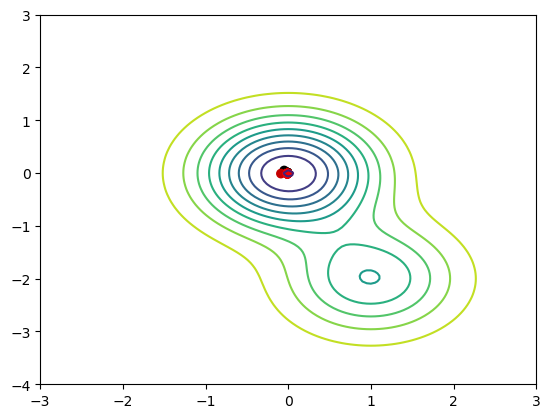

In [ ]:

def objective_function(x, y):
    return 1.5 - np.exp(-x**2 - y**2) - 0.5 * np.exp(-(x - 1)**2 - (y + 2)**2)


aoi = [-2.5, 2.5]

ga = GeneticAlgorithm(chromosome_length=16, obj_func_num_args=2, objective_function=objective_function, aoi=aoi, population_size=100)
ga.run()